# Working with tide data

In this notebook, we will read two different tide datasets, and compare them.

One is the forecast astronomical tides
One is the actual measured data from the same location


In [2]:
# some imports for the usual stuff:
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import scipy as sp

import pandas as pd

In [3]:
# create a pandas Dataframe from the csv file
df = pd.read_csv("NVT_WATHTE_HARL.csv",delimiter=';')

In [4]:
print(df)

          Datum      Tijd                                          Parameter  \
0     24-8-2018  17:20:00  Waterhoogte Oppervlaktewater t.o.v. Normaal Am...   
1     24-8-2018  17:30:00  Waterhoogte Oppervlaktewater t.o.v. Normaal Am...   
2     24-8-2018  17:40:00  Waterhoogte Oppervlaktewater t.o.v. Normaal Am...   
3     24-8-2018  17:50:00  Waterhoogte Oppervlaktewater t.o.v. Normaal Am...   
4     24-8-2018  18:00:00  Waterhoogte Oppervlaktewater t.o.v. Normaal Am...   
5     24-8-2018  18:10:00  Waterhoogte Oppervlaktewater t.o.v. Normaal Am...   
6     24-8-2018  18:20:00  Waterhoogte Oppervlaktewater t.o.v. Normaal Am...   
7     24-8-2018  18:30:00  Waterhoogte Oppervlaktewater t.o.v. Normaal Am...   
8     24-8-2018  18:40:00  Waterhoogte Oppervlaktewater t.o.v. Normaal Am...   
9     24-8-2018  18:50:00  Waterhoogte Oppervlaktewater t.o.v. Normaal Am...   
10    24-8-2018  19:00:00  Waterhoogte Oppervlaktewater t.o.v. Normaal Am...   
11    24-8-2018  19:10:00  Waterhoogte O

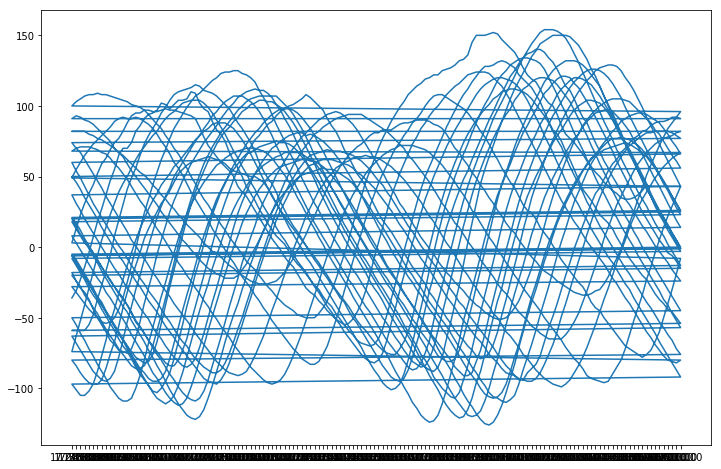

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches((12,8))
X = df['Tijd']
Y = df['Meting']
ax.plot(X,Y)


# Hints for parsing datetimes

The python datetime object has a parser called: `datetime.strptime()`. YOu can apss it a string to parse, and a format string that tells it how it is formatted. THe format codes are doumented here: 

https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior

For this exercise, this format string should work:

In [7]:
dt = datetime.strptime('24-8-2018 17:50:00', "%d-%m-%Y %H:%M:%S" )
print(dt)

2018-08-24 17:50:00


In [1]:
import csv
def read_tide_measurements(filename):
    times = []
    heights = []
    with open(filename) as infile:
        # skip the first row
        infile.readline()
        for row in csv.reader(infile, delimiter=";"):
            # fill this in here:            
            pass
    return times, heights

In [32]:
## Or you can take advantage of panda's csv reading:
def read_from_dataframe(filename):
    df = pd.read_csv(filename,delimiter=';')
    # the date is in the "Datum" column
    # the time is in the "Tijd" column
    # the height in in the "Meting" column
    times = []
    heights = [] 
    for row in df.itertuples():
        dt_str = row.Datum + " " + row.Tijd
        times.append(datetime.strptime(dt_str, "%d-%m-%Y %H:%M:%S"))
        heights.append(row.Meting)
    return times, heights

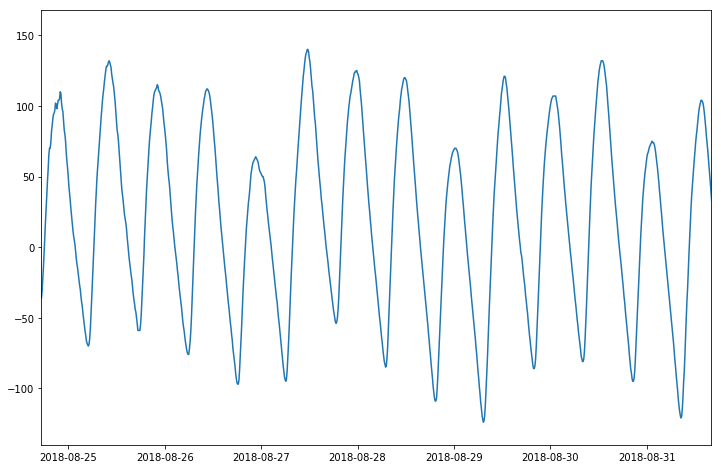

In [41]:
# T, H = read_tide_measurements("NVT_WATHTE_HARL.csv")
T, H = read_from_dataframe("NVT_WATHTE_HARL.csv")

fig, ax = plt.subplots()
fig.set_size_inches((12,8))

# ax.set_xlim((times[0], times[1000]))

ax.plot(T,H)


(736930.7222222222, 736931.4166666666)